<a href="https://colab.research.google.com/github/Jerry0209/FundamentalLearningEPFL/blob/main/HW2/hw2_theory_v1_Tianrui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2

# Part 1: Expected Prediction Risk (EPR)

The Expected Prediction Risk (EPR) is a fundamental concept that helps us measure how well our predictions match reality, accounting for all possible scenarios weighted by their probability of occurrence. Consider a supervised learning problem with a dataset $(x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i$ are the labels (being them real numbers or categorical). We assume that the data is generated by a joint distribution, with density function $p(x,y)$. We fit a model $f(x)$ to this dataset.

Given a measure of risk $L(y, f(x))$, the Expected Prediction Risk (EPR) is defined as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[L(Y, f(X))]$$


First, let us consider the regression case.

Consider a dataset $\mathcal{D}_{regr} = (x_i, y_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $y_i \in \mathbb{R}$.

We have seen in the class that in regression cases, the squared loss is a natural choice. Consider the squared loss function $L(y, f(x)) = (y - f(x))^2$. We define the Expected Prediction Risk (EPR) as:

$$\text{EPR}[f] = \mathbb{E}_{X,Y}[(Y - f(X))^2]$$

### **Q1**: Simplify the expression of the EPR(f) to obtain that the EPR is minimized by the conditional mean of Y given X.

### **Q1 Ans**

1.  **Start with the definition of EPR(squared loss):**

    * As $\Pr(X, Y) = \Pr(Y|X)\Pr(X)$
    * Then $\text{EPR}[f]$ becomes
  
$$

\begin{align}
\text{EPR}[f] &= \mathbb{E}_{X,Y}[(Y - f(X))^2] \\
              &= \int \left[y - f(x)\right]^2 p(x,y) \\ &= \int \left[y - f(x)\right]^2 p(y|x)p(x)dy dx \\ &= \int \Bigg( \int \left[y - f(x)\right]^2 p(y|x)dy \Bigg) p(x)dx \\ &= \int \Bigg( \mathbb{E}_{Y|X}[(Y - f(X))^2 | X=x] \Bigg) p(x)dx \\
              &= \mathbb{E}_X\Big[ \mathbb{E}_{Y|X}[(Y - f(X))^2 \mid X] \Big]
\end{align}

$$


2.  **Pointwise Minimization:** To minimize the overall EPR, we can find the function $f(x)$ that minimizes the inner expectation for any given point $x$. It's shown that the EPR is minimized by the conditional mean of Y given X ($\mathbb{E}_{Y|X}[(Y - f(X))^2 | X=x]$). 

Let us consider now a categorical dataset. In order to highlight the difference with the regression case, we will use a different notation to highlight the difference: $\mathcal{D}_{class} = (x_i, c_i)_{i=1}^N$ where $x_i \in \mathbb{R}^d$ and $c_i \in \{1, \ldots, K\}$ is the true class of the $i$-th sample. We fit a model $\hat{c}(x){\in \{1, \ldots, K\}}$ to this dataset.

### **Q2** Write the expression of the EPR for the classification case simplified as much as possible for general risk functions.

### **Q2 Ans**
1. Start with the definition of EPR: For classification, the model is $\hat{c}(x)$ and the true class is $C$.
    
    $$
    \text{EPR}[\hat{c}] = \mathbb{E}_{X,C}[L(C, \hat{c}(X))]
    $$
    

2. Use the simplified version as Q1
    
    $$
    \text{EPR}[\hat{c}] = \mathbb{E}_X\left[\mathbb{E}_{C|X}[L(C, \hat{c}(X)) | X]\right]
    $$
    

3. Simplify the Inner Expectation: The inner expectation is over the discrete classes $c_k \in \{1, \ldots, K\}$. Based on the definition of discrete expected value variable ($\mathbb{E}[Z]=\sum_iz_ip_i$), we can rewrite this expectation as a sum, weighted by the posterior probabilities $P(c_k| X=x)$.

    $$
    \mathbb{E}_{C|X}[L(C, \hat{c}(x)) | X=x] = \sum_{k=1}^K L(c_k, \hat{c}(x)) P(c_k | X=x)
    $$

4. Final Expression: The outer expectation $\mathbb{E}_X[\dots]$ is an integral over all possible values of $x$, weighted by the data's density function $p(x)$. Substituting the inner sum gives the final simplified expression:

    $$
    \text{EPR}[\hat{c}] = \mathbb{E}_{X}\sum_{k=1}^K L(c_k, \hat{c}(X)) P(c_k | X)
    $$


### **Q3** Find the optimal classifier for 0-1 loss: $L(c, \hat{c}) = \mathbb{I}(c \neq \hat{c})$ known as the Bayes classifier.


### **Q3 Ans**

1. **Define the Pointwise Minimization:** To minimize the overall EPR, we must minimize the conditional risk for each specific realization $X=x$. Let $\hat{c}$ be our predicted class. We sum over all possible true classes $c_j$:
    
    $$
    c^*(x) = \arg\min_{\hat{c} \in \{1, \ldots, K\}} \sum_{j=1}^K L(c_j, \hat{c}) P(c_j \mid X=x)
    $$

2. **Plug in the 0-1 Loss:** The loss function is $L(c_j, \hat{c}) = \mathbb{I}(c_j \neq \hat{c})$.
    
    $$
    c^*(x) = \arg\min_{\hat{c}} \sum_{j=1}^K \mathbb{I}(c_j \neq \hat{c}) P(c_j \mid X=x)
    $$

3. **Simplify the Sum:** The indicator function $\mathbb{I}(c_j \neq \hat{c})$ is $1$ when the true class $c_j$ is different from our prediction $\hat{c}$, and $0$ otherwise. Thus, the sum represents the total probability of making an error:
    
    $$
    \sum_{j: c_j \neq \hat{c}} P(c_j \mid X=x) = P(C \neq \hat{c} \mid X=x)
    $$

4. **Relate to Maximization:** Since the probabilities of all classes sum to 1, the probability of error is the complement of the probability of being correct:
    
    $$
    P(C \neq \hat{c} \mid X=x) = 1 - P(C = \hat{c} \mid X=x)
    $$

5. **Derive the Bayes Classifier:** Substituting this back into the minimization problem:
    
    $$
    c^*(x) = \arg\min_{\hat{c}} [1 - P(C = \hat{c} \mid X=x)]
    $$

    Minimizing $1 - P(\dots)$ is equivalent to maximizing $P(\dots)$. Therefore, the optimal classifier assigns $x$ to the class with the highest posterior probability:
    
    $$
    c^*(x) = \arg\max_{k \in \{1, \ldots, K\}} P(c_k \mid X=x)
    $$
    
    This reasonable solution is known as the **Bayes classifier**.

Let us apply these concepts to Gaussian Mixture Models. Let us fix the number of components $K=3$ and consider the following model for the joint distribution $p(x,c)$:

$$p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$$
$$p(c_k) = \pi_k$$
where $\pi_k$ are the probabilities of the different classes, $\mu_k$ are the means and $\Sigma_k$ are the covariance matrices of the $k$-th component.



### **Q4** Write a python function that generates samples from this model.



In [1]:
import numpy as np

# Get one sample from GMM
def gaussianMixture(pis, means, covs, n_components):

    # Check wether the length of each components are correct
    len_pis = len(pis);
    len_means = len(means);
    len_covs = len(covs);

    if (n_components != len_pis):
        print("Unmatched Data Length: len_pis!")
        return 0

    if (n_components != len_means):
        print("Unmatched Data Length: len_means!")
        return 0

    if (n_components != len_covs):
        print("Unmatched Data Length: len_covs!")
        return 0

    # Pick one component from n_comonents

    index_k = np.arange(n_components) # starts from 0
    component_k = np.random.choice(index_k, p=pis)

    component_mean = means[component_k];
    component_cov = covs[component_k];

    # Get one sample [X, C]
    sample = np.random.multivariate_normal(component_mean, component_cov)

    # Return sample and its label
    return sample, component_k


# Get N samples from GMM
def generate_N_GMM_samples(pis, means, covs, n_components, n_samples):
    samples_array = np.zeros((n_samples, 2))
    labels_array = np.zeros(n_samples, dtype=int)

    # Get labels and samples
    for i in range(n_samples): 
        random_sample, random_label = gaussianMixture(pis, means, covs, n_components)
        samples_array[i] = random_sample
        labels_array[i] = random_label

    return samples_array, labels_array


### **Q5** Take now 1000 samples from this model and plot them using matplotlib using the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$:

$$\pi = [0.3, 0.4, 0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$$


First 5 samples:
[[ 3.90351446  1.00862055]
 [ 0.12853126  0.35623987]
 [ 0.81752085  2.50202541]
 [-1.21538371  3.26130148]
 [ 0.44136275  0.9421335 ]]

First 5 labels:
[1 0 2 2 2]


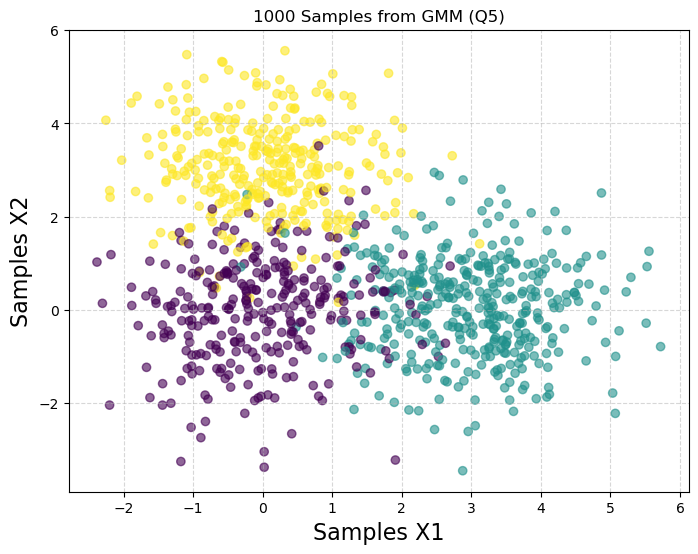

In [2]:
# Inputs of the model
K = 3

pis = np.array([0.3, 0.4, 0.3]);

means = np.array([
    [0, 0],
    [3, 0],
    [0, 3]
])


covs = np.array([
    [[1, 0], [0, 1]],
    [[1, 0], [0, 1]],
    [[1, 0], [0, 1]]
])

samples_data, labels_data = generate_N_GMM_samples(pis, means, covs, K, 1000)

print("First 5 samples:")
print(samples_data[:5])
print("\nFirst 5 labels:")
print(labels_data[:5])


# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(samples_data[:, 0], samples_data[:, 1], c=labels_data, alpha=0.6, cmap='viridis')
# Entire Row, for each entry [X, C], first element is X, the second element is C (category)

plt.title("1000 Samples from GMM (Q5)")
plt.xlabel('Samples X1', fontsize=16)
plt.ylabel('Samples X2', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

We define the decision boundary between two classes $c_i$ and $c_j$ as the set of points where the posterior probability of the two classes is equal. Write the expression of the decision boundary for this model.

### **Q6** Compute the posterior probabilities for this model.

### **Q6 Ans**
Using Bayes' theorem, the posterior probability will be:

$$
P(c_k | x) = \frac{p(x|c_k) P(c_k)}{p(x)}
$$

By substituting the specific components of the Gaussian Mixture Model :

* $P(c_k) = \pi_k$ (The prior probability, or weight, of component $k$)
* $p(x|c_k) = \mathcal{N}(x|\mu_k, \Sigma_k)$ (The likelihood of $x$ under component $k$'s Gaussian)

* $p(x)$ is the total probability (evidence) of $x$, found by summing the joint probabilities over all $K$ components: $p(x) = \sum_{j=1}^K p(x, c_j) = \sum_{j=1}^K p(x|c_j) P(c_j)$

Final formula will be:
$$
P(c_k | x) = \frac{\pi_k \mathcal{N}(x|\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j \mathcal{N}(x|\mu_j, \Sigma_j)}
$$

### Prediction Function Implementation
The `predict_class_GMM` function below is a direct implementation of the optimal Bayes Classifier(derived in Q3). The goal of this function is not to find the boundary itself, but to determine the "winning" class for any single point $x$. The Bayes classifier rule states that the optimal choice is the class $k$ that has the highest posterior probability, $P(c_k | X=x)$. The function uses an `argmax` operation to find exactly this.

To make this calculation efficient, the function uses a common optimization. The full posterior probability is calculated as $P(c_k | x) = \frac{p(x|c_k) P(c_k)}{p(x)}$. When comparing the posteriors for different classes (e.g., $k=1, 2, 3$) for the *same* point $x$, the denominator $p(x)$ is identical for all of them.

Because this $p(x)$ term is a constant divisor, it does not change which class $k$ will have the highest probability. Therefore, to find the $\text{argmax}_{c_k} P(c_k | X = x)$, we only need to find the $\text{argmax}_{c_k} [P(x | c_k) P(c_k)]$. The function does exactly this: it calculates this numerator score for each class and returns the index $k$ that has the highest score, which is computationally faster and gives the identical result.


In [3]:
from scipy.stats import multivariate_normal
# p(c_k) is given

# p(x|c_k)
def likelihood_GMM(pis, means, covs, component_k, sample_x):
    pdf_k = multivariate_normal(mean=means[component_k], cov=covs[component_k])
    likelihood = pdf_k.pdf(sample_x)
    return likelihood

# p(x)
def evidence_GMM(pis, means, covs, n_components, sample_x):
    evidence = 0;
    for k in range(0, n_components):
        evidence += pis[k] * likelihood_GMM(pis, means, covs, k, sample_x)
        
    return evidence

# Posterior p(c_k|x)
def posterior_GMM(pis, means, covs, n_components, component_k, sample_x):
    ev = evidence_GMM(pis, means, covs, n_components, sample_x)

    # Defense Programming: in case evidence = 0 (impossible to be divided by 0)
    if ev == 0:
        return 0.0
    
    numerator = pis[component_k] * likelihood_GMM(pis, means, covs, component_k, sample_x)
    return numerator / ev 

# Predict classes
def predict_class_GMM(pis, means, covs, n_components, sample_x):
    # p(x) is constant for the same x, to improve efficiency, I try only calculating the score: prior * likelihood
    # This implements argmax_k P(C=k | x)
    scores = np.zeros(n_components)
    for k in range(n_components):
        # score_k = p(C=k) * p(x | C=k)
        scores[k] = pis[k] * likelihood_GMM(pis, means, covs, k, sample_x)
        
    # Return the *index* (0, 1, or 2) of the class with the highest score
    return np.argmax(scores)

### **Q7A** Compute analytically the decision boundary between class 1 and class 2.

To find the decision boundary between class 1 and class 2, we must first understand its definition. The decision boundary is simply the set of points $x$ where the probability of an observation belonging to class 1 is the same as it belonging to class 2. We write this as:

$$
P(c_1 | x) = P(c_2 | x)
$$

This expression can be simplified using Bayes' Theorem. Since the term $p(x)$ appears in the denominator for both sides and is the same, we can remove it. This leaves us with an equation where the product of likelihood and prior probability for each class must be equal. Using our Gaussian Mixture Model definitions where $P(c_k) = \pi_k$ and the likelihood is a Gaussian distribution, we have:

$$
\pi_1 \mathcal{N}(x|\mu_1, \Sigma_1) = \pi_2 \mathcal{N}(x|\mu_2, \Sigma_2)
$$

To make this equation easier to solve, we take the natural logarithm of both sides. This allows us to work with sums instead of products and simplifies the exponential term in the Gaussian distribution. The equation then becomes:

$$
\log(\pi_1) + \log(\mathcal{N}(x|\mu_1, \Sigma_1)) = \log(\pi_2) + \log(\mathcal{N}(x|\mu_2, \Sigma_2))
$$

The log-likelihood of a Gaussian is generally given by:

$$
\log \mathcal{N}(x|\mu, \Sigma) = -\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) - \frac{1}{2}\log(|\Sigma|) - \text{const}
$$

For this specific problem (Q5 model), we have a special case where the covariance matrices are identical identity matrices, $\Sigma_1 = \Sigma_2 = I$. This simplifies things greatly. The term $\log(|\Sigma|)$ is the same on both sides and cancels out. Also, because $\Sigma = I$, the quadratic term $(x-\mu)^T \Sigma^{-1} (x-\mu)$ simplifies to just $(x-\mu)^T(x-\mu)$. The squared terms $x^T x$ on both sides will also cancel out, leaving us with a linear equation. Additionally, since $\mu_1$ is the zero vector, any terms involving it will disappear.

After these cancellations and simplifications, our equation reduces to:

$$
\log(\pi_1) + \mu_1^T x - \frac{1}{2}\mu_1^T \mu_1 = \log(\pi_2) + \mu_2^T x - \frac{1}{2}\mu_2^T \mu_2
$$

$$
\log(\pi_1) = \log(\pi_2) + \mu_2^T x - \frac{1}{2}\mu_2^T\mu_2
$$

Now we substitute the specific values given in the problem. We have $x = [x_1, x_2]^T$, the priors are $\pi_1 = 0.3$ and $\pi_2 = 0.4$, and the means are $\mu_1 = [0, 0]^T$ and $\mu_2 = [3, 0]^T$.

We can calculate each term individually. The inner product term is $(\mu_2 - \mu_1)^T x = [3, 0] [x_1, x_2]^T = 3x_1$. The difference in log priors is $\log(0.3) - \log(0.4) = \log(0.75)$. The quadratic mean terms are $\frac{1}{2}\mu_1^T \mu_1 = 0$ and $\frac{1}{2}\mu_2^T \mu_2 = \frac{1}{2}(3^2 + 0^2) = 4.5$.

 putting it all together, we get the final linear equation:

$$
\log(0.3) = \log(0.4) + 3x_1 - 4.5
$$

Rearranging to solve for $x_1$:

$$
3x_1 = 4.5 + \log(0.3) - \log(0.4)
$$

$$
3x_1 = 4.5 + \log(0.75)
$$

$$
x_1 = 1.5 + \frac{\log(0.75)}{3}
$$

Calculating the numerical value gives us $x_1 \approx 1.404$. This result represents a vertical line at this x-coordinate, which acts as the linear decision boundary separating class 1 from class 2.


In [4]:
# Plots the GMM decision regions (contour) and data (scatter)
def plot_decision_boundary_base(pis, means, covs, n_components, samples_data, labels_data):

    # Define grid boundaries from data
    x_min, x_max = samples_data[:, 0].min() - 1, samples_data[:, 0].max() + 1
    y_min, y_max = samples_data[:, 1].min() - 1, samples_data[:, 1].max() + 1
    
    # Create the meshgrid
    h = 0.05 # Step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict class for each grid point
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    print("Predicting on grid points... (this may take a moment)")
    Z = np.array([predict_class_GMM(pis, means, covs, n_components, pt) for pt in grid_points])
    print("Prediction complete.")
    
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(samples_data[:, 0], samples_data[:, 1], c=labels_data, 
                cmap='viridis', edgecolors='k', s=25, alpha=0.7)
    
    plt.title("Optimal Decision Boundaries")
    plt.xlabel("X1")
    plt.ylabel("X2")
    
    # Return the y-axis limits
    return y_min, y_max


### **Q7B** Plot the optimal decision boundary for this model using the above calcultations.


Predicting on grid points... (this may take a moment)
Prediction complete.


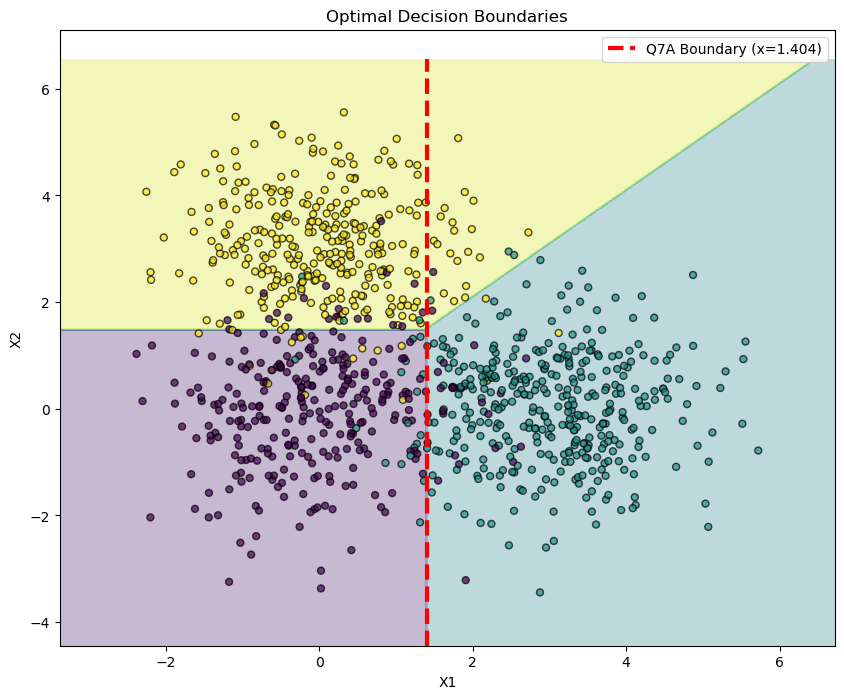

In [5]:
# Use plot_decision_boundary_base() function to plot
y_min_q5, y_max_q5 = plot_decision_boundary_base(
    pis, 
    means, 
    covs, 
    K, 
    samples_data, 
    labels_data
)

# Boundary in Q7A
x_boundary_1_2 = (4.5 + np.log(0.75)) / 3.0

# Show this boundary
plt.vlines(x=x_boundary_1_2, 
           ymin=y_min_q5, 
           ymax=y_max_q5, 
           colors='red', 
           linestyles='--', 
           linewidth=3, 
           label=f'Q7A Boundary (x={x_boundary_1_2:.3f})')

plt.legend()
plt.show()

### **Q8** Compute the error of the Bayes classifier on the dataset in Q5 as measured by the misclassification rate.


In [6]:
# Misclassification rate is the ratio of (number of misclassification) and total number of samples
def compute_error(pis, means, covs, n_components, samples_data, true_labels):   
    # Get the total number of samples
    n_samples = len(true_labels)
    
    predicted_labels = np.zeros(n_samples, dtype=int)
    
    print(f"Calculating predictions for {n_samples} samples...")
    
    # Loop over every sample in the dataset
    for i in range(n_samples):
        sample_x = samples_data[i]
        
        # Predict the class using the Bayes classifier function
        pred_label = predict_class_GMM(pis, means, covs, n_components, sample_x)
        predicted_labels[i] = pred_label
        
    # Compare and count errors
    # np.sum() counts True as 1 and False as 0.
    incorrect_predictions = np.sum(predicted_labels != true_labels)
    
    # Calculate the rate
    misclassification_rate = incorrect_predictions / n_samples
    
    return misclassification_rate, incorrect_predictions


# Call the error function on the Q5 data
misclassification_rate, misclassification_count = compute_error(
    pis, 
    means, 
    covs, 
    K, 
    samples_data, 
    labels_data
)

print("\n--- Q8 Results ---")
print(f"Dataset: Q5 Model (Identical Covariances)")
print(f"Total samples tested: {len(labels_data)}")
print(f"Incorrect predictions: {misclassification_count}")
print(f"Misclassification Rate: {misclassification_rate * 100:.2f}%")

Calculating predictions for 1000 samples...

--- Q8 Results ---
Dataset: Q5 Model (Identical Covariances)
Total samples tested: 1000
Incorrect predictions: 87
Misclassification Rate: 8.70%


Consider now the case where the covariance matrices are different. Take the following choice for $\{\pi_k, \mu_k, \Sigma_k\}_{k=1}^3$:

$$\pi = [\pi_1=0.3, \pi_2=0.4, \pi_3=0.3]$$

$$\mu_1 = \left[\begin{array}{c} 0 \\ 0 \end{array}\right], \mu_2 = \left[\begin{array}{c} 3 \\ 0 \end{array}\right], \mu_3 = \left[\begin{array}{c} 0 \\ 3 \end{array}\right]$$

$$\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right], \Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right], \Sigma_3 = \left[\begin{array}{cc} 1 & 0.5 \\ 0.5 & 1 \end{array}\right]$$

### **Q9** What is the decision boundary between class 1 and class 2 in this case?
Note: a fully analytical or functional solution might be difficult to obtain; only an interpretable and practical solution for plotting is required.


### **Q9 Ans**

To answer this question, we first need to define the decision boundary. This boundary is essentially the set of points $x$ where the probability of belonging to class 1 is same as belonging to class 2. Therefore, we start by equating the posterior probabilities:
$$P(c_1 | x) = P(c_2 | x)$$

Next, we can simplify this relationship using Bayes' Theorem. Since the total probability $p(x)$ acts as a common denominator on both sides, we can ignore it and focus only on the numerators. This mean that the equality holds when the product of the likelihood and the prior probability are equal. We plug in the Gaussian Mixture Model definitions where the prior is $P(c_k) = \pi_k$ and the likelihood is given by the Gaussian distribution:
$$p(x | c_1) P(c_1) = p(x | c_2) P(c_2)$$
$$\pi_1 \mathcal{N}(x|\mu_1, \Sigma_1) = \pi_2 \mathcal{N}(x|\mu_2, \Sigma_2)$$

To make the equation easier to handle, we take the natural logarithm of both sides. This converts the multiplication into addition and helps us work with the exponential functions in the Gaussian distribution. The equation becomes:
$$\log(\pi_1) + \log(\mathcal{N}(x|\mu_1, \Sigma_1)) = \log(\pi_2) + \log(\mathcal{N}(x|\mu_2, \Sigma_2))$$
We also need the expanded form of the Gaussian log-likelihood, which is:
$$\log \mathcal{N}(x|\mu, \Sigma) = -\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) - \frac{1}{2}\log(|\Sigma|) - \frac{d}{2}\log(2\pi)$$

Now we apply this to our specific problem in Q9. We substitute the full log-likelihood into our previous equation. The constant term $\frac{d}{2}\log(2\pi)$ appears on both sides, so it cancels out. However, unlike the earlier question Q7A, here the covariances are unequal, with $\Sigma_1 = \left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array}\right]$ and $\Sigma_2 = \left[\begin{array}{cc} 2 & 0 \\ 0 & 2 \end{array}\right]$. Because $\Sigma_1 \neq \Sigma_2$, the determinant terms $\log(|\Sigma_k|)$ do not cancel. Furthermore, since $\Sigma_1^{-1} \neq \Sigma_2^{-1}$, the quadratic terms involving $x^T \Sigma_k^{-1} x$ does not cancel either.

Finally, we arrive at the interpretable expression for the boundary. The full equation is:
$$\log(\pi_1) - \frac{1}{2}\log(|\Sigma_1|) - \frac{1}{2}(x-\mu_1)^T \Sigma_1^{-1} (x-\mu_1) = \log(\pi_2) - \frac{1}{2}\log(|\Sigma_2|) - \frac{1}{2}(x-\mu_2)^T \Sigma_2^{-1} (x-\mu_2)$$
Because the quadratic terms $x^T \Sigma^{-1} x$ remain, this is a quadratic equation in $x$ containing $x_1^2$ and $x_2^2$ terms. This results in a solution that is a curve, specifically a conic section, rather than a straight line like in the previous case.

In [7]:
# Inputs of the model (Q9)
K_q9 = 3

pis_q9 = np.array([0.3, 0.4, 0.3]);

means_q9 = np.array([
    [0, 0],
    [3, 0],
    [0, 3]
])


covs_q9 = np.array([
    [[1, 0], [0, 1]],
    [[2, 0], [0, 2]],
    [[1, 0.5], [0.5, 1]]
])

samples_data_q9, labels_data_q9 = generate_N_GMM_samples(pis_q9, means_q9, covs_q9, K_q9, 1000)

print("First 5 samples:")
print(samples_data_q9[:5])
print("\nFirst 5 labels:")
print(labels_data_q9[:5])

First 5 samples:
[[-0.50294781  2.43238415]
 [ 2.81409166 -0.88660839]
 [ 0.5872892  -0.39260083]
 [ 0.95990616  3.49091277]
 [ 2.7294371  -1.58800509]]

First 5 labels:
[2 1 0 2 1]


### **Q10** Plot the decision boundary for this model and discuss the difference with the previous case (if any).



### **Q10 Ans**

The most significant difference from the previous plot in Q7B is that the decision boundaries are no longer straight lines but are now clearly quadratic curves, or conic sections. This change is a direct theoretical consequence of the new model parameters. In the previous case (Q5), all components shared identical covariance matrices ($\Sigma_k = I$). As shown in the Q7A derivation, this led to a crucial cancellation of all quadratic terms (like $x^T \Sigma^{-1} x$) and determinant terms ($\log(|\Sigma_k|)$) in the boundary equation, resulting in a simple linear solution.

In this new model (Q9), the covariance matrices $\Sigma_k$ are unequal. Because of this, the quadratic terms and the determinant terms in the log-likelihood equation **do not** cancel. The final equation for the decision boundary remains a full quadratic equation, which naturally produces the curved boundaries seen in the plot. This means the Bayes classifier is now sensitive not only to the priors ($\pi_k$) and means ($\mu_k$) but also to the unique shape and scale of each component, as defined by $\Sigma_k$ and its determinant, $|\Sigma_k|$. This is visible, for example, where the boundary between $c_1$ ($\Sigma_1=I$) and $c_2$ ($\Sigma_2=2I$) curves around $c_1$, effectively "giving more space" to the more spread-out $c_2$ component. Likewise, the boundaries involving $c_3$ are tilted to align with the correlation in its covariance matrix (0.5 in the matrix).

Predicting on grid points... (this may take a moment)
Prediction complete.


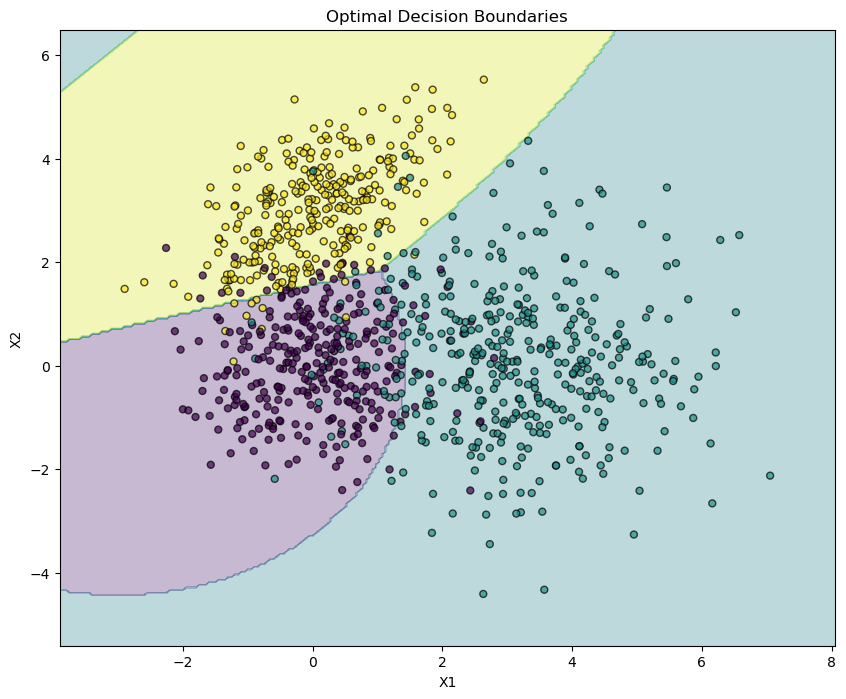

In [8]:
plot_decision_boundary_base(pis_q9, means_q9, covs_q9, K_q9, samples_data_q9, labels_data_q9)
plt.show()

### **Q11** Sample 1000 points from the heterogeneous model defined after Q8 and plot them.

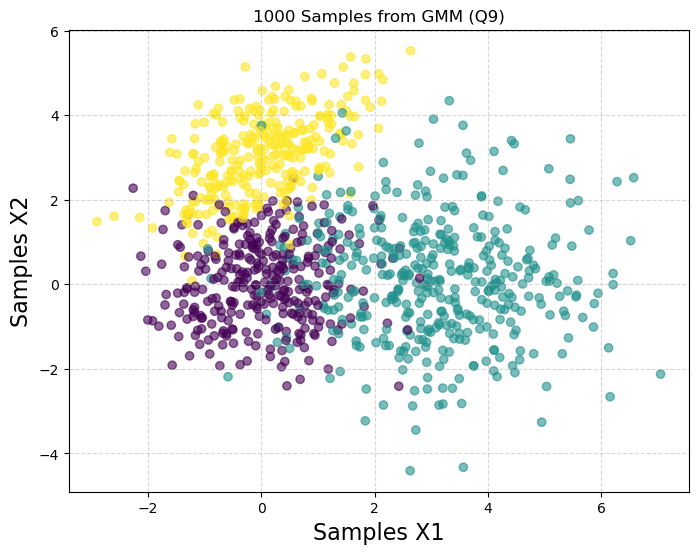

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(samples_data_q9[:, 0], samples_data_q9[:, 1], c=labels_data_q9, alpha=0.6, cmap='viridis')

plt.title("1000 Samples from GMM (Q9)")
plt.xlabel('Samples X1', fontsize=16)
plt.ylabel('Samples X2', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Q12** Compute the error of the Bayes classifier on this dataset.

In [10]:
# Call the error function on the Q9 data
misclassification_rate_q9, misclassification_count_q9 = compute_error(
    pis_q9, 
    means_q9, 
    covs_q9, 
    K, 
    samples_data_q9, 
    labels_data_q9
)

print("\n--- Q12 Results ---")
print(f"Dataset: Q9 Model (Different Covariances)")
print(f"Total samples tested: {len(labels_data_q9)}")
print(f"Incorrect predictions: {misclassification_count_q9}")
print(f"Misclassification Rate: {misclassification_rate_q9 * 100:.2f}%")


Calculating predictions for 1000 samples...

--- Q12 Results ---
Dataset: Q9 Model (Different Covariances)
Total samples tested: 1000
Incorrect predictions: 108
Misclassification Rate: 10.80%
